In [1]:
!python -V

Python 3.9.12


In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    numerical = ['trip_distance']

    dicts = df[categorical + numerical].to_dict(orient='records')
    return dicts

In [27]:
reference = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-02.parquet')

In [38]:
prediction = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2020-06.parquet')

In [6]:
import mlflow 

In [9]:
model = mlflow.pyfunc.load_model('s3://mlflow-models-alexey/1/ad1e2a9faac04b948f7b5d699b920c85/artifacts/model')

2022/10/21 10:57:52 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - argparse (current: 1.1, required: argparse==1.4.0)
 - cloudpickle (current: 2.2.0, required: cloudpickle==2.0.0)
 - psutil (current: 5.9.3, required: psutil==5.8.0)
 - scikit-learn (current: 1.1.2, required: scikit-learn==1.0.2)
 - typing-extensions (current: uninstalled, required: typing-extensions==4.2.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [28]:
y_ref = model.predict(reference)


In [39]:
y_pred = model.predict(prediction)

In [40]:
pd.Series(y_ref).describe()

count    69399.000000
mean        14.101513
std          5.546710
min         -9.220606
25%         10.144273
50%         12.605684
75%         17.377082
max         59.788461
dtype: float64

In [41]:
pd.Series(y_pred).describe()

count    63110.000000
mean        17.108438
std          7.597251
min        -12.560213
25%         10.595216
50%         16.005466
75%         22.178961
max         69.051335
dtype: float64

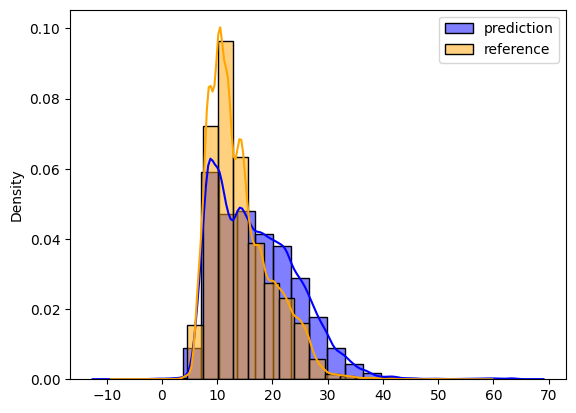

In [42]:
sns.histplot(y_pred, kde=True, stat="density", color='blue', bins=25, label='prediction')
sns.histplot(y_ref, kde=True, stat="density", color='orange', bins=25, label='reference')

plt.legend()